<a href="https://colab.research.google.com/github/ahmedmoustafa/AUC-Fundamentals-of-Data-Science-II-Spring-2023/blob/main/examples/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Wrangling and Visualization with Pandas and Seaborn

Import `pandas` and `seaborn`

In [1]:
import pandas as pd
import seaborn as sns

Create the data

In [2]:
sales_data = {'Product': ['A', 'B', 'A', 'C', 'A', 'B', 'A', 'C', 'B', 'C'],
        'Region': ['East', 'West', 'East', 'West', 'East', 'West', 'East', 'West', 'East', 'West'],
        'Quantity': [10, 5, 8, 6, 12, 7, 15, 4, 3, 10],
        'Price': [100, 200, 100, 300, 100, 200, 100, 300, 200, 300]}

sales_data

{'Product': ['A', 'B', 'A', 'C', 'A', 'B', 'A', 'C', 'B', 'C'],
 'Region': ['East',
  'West',
  'East',
  'West',
  'East',
  'West',
  'East',
  'West',
  'East',
  'West'],
 'Quantity': [10, 5, 8, 6, 12, 7, 15, 4, 3, 10],
 'Price': [100, 200, 100, 300, 100, 200, 100, 300, 200, 300]}

Create the **data frame**

In [3]:
sales_df = pd.DataFrame(sales_data)
sales_df

,Product,Region,Quantity,Price
0,A,East,10,100
1,B,West,5,200
2,A,East,8,100
3,C,West,6,300
4,A,East,12,100
5,B,West,7,200
6,A,East,15,100
7,C,West,4,300
8,B,East,3,200
9,C,West,10,300


**Group** the data frame by `Product`

In [4]:
sales_grouped = sales_df.groupby('Product')
sales_grouped

In [5]:
sales_grouped.size()

Product
A    4
B    3
C    3
dtype: int64

In [6]:
sales_grouped.size().reset_index()

,Product,0
0,A,4
1,B,3
2,C,3


In [7]:
sales_grouped.size().reset_index(name = "Count")

,Product,Count
0,A,4
1,B,3
2,C,3


Aggregate by summing the `Quantity` and computing the mean `Price`

In [8]:
sales_grouped.agg({'Quantity': 'sum', 'Price': 'mean'})

,Quantity,Price
Product,,
A,45,100.0
B,15,200.0
C,20,300.0


All in a single line, on the fly, grouping then aggregating

In [9]:
sales_df.groupby('Product').agg({'Quantity': 'sum', 'Price': 'mean'})

,Quantity,Price
Product,,
A,45,100.0
B,15,200.0
C,20,300.0


We can also rename the aggregated columns to reflect what they represent

In [10]:
sales_df.groupby('Product').agg({'Quantity': 'sum', 'Price': 'mean'}).rename(columns={'Quantity': 'Total_Quantity', 'Price': 'Average_Price'})

,Total_Quantity,Average_Price
Product,,
A,45,100.0
B,15,200.0
C,20,300.0


Assigning the summary data to a new data frame

In [11]:
summary_df = sales_df.groupby('Product').agg({'Quantity': 'sum', 'Price': 'mean'}).reset_index().rename(columns={'Quantity': 'Total_Quantity', 'Price': 'Average_Price'})
summary_df

,Product,Total_Quantity,Average_Price
0,A,45,100.0
1,B,15,200.0
2,C,20,300.0


<Axes: xlabel='Product', ylabel='Average_Price'>

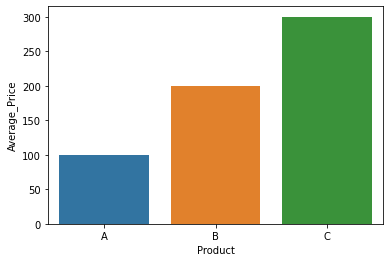

In [12]:
sns.barplot(data = summary_df, x = 'Product', y = 'Average_Price')

We can group by multiple columns e.g. `Product` and `Region`

In [13]:
product_region_df = sales_df.groupby(['Product', 'Region']).agg(Average_Price=('Price', 'mean')).reset_index()
product_region_df

,Product,Region,Average_Price
0,A,East,100.0
1,B,East,200.0
2,B,West,200.0
3,C,West,300.0


Barplot where the bars are color-coded according to `Region`

<Axes: xlabel='Product', ylabel='Average_Price'>

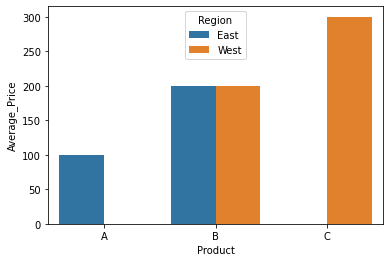

In [14]:
sns.barplot(data = product_region_df, x = 'Product', y = 'Average_Price', hue = 'Region')

We can merge (join) two data frame based on common columns. So let's first create a new data frame for the product info

In [15]:
products_data = {'Product': ['A', 'B', 'C'],
                'Product_Name': ['Product A', 'Product B', 'Product C'],
                'Category': ['Electronics', 'Electronics', 'Home']}

products_df = pd.DataFrame(products_data)
products_df

,Product,Product_Name,Category
0,A,Product A,Electronics
1,B,Product B,Electronics
2,C,Product C,Home


In [16]:
sales_df

,Product,Region,Quantity,Price
0,A,East,10,100
1,B,West,5,200
2,A,East,8,100
3,C,West,6,300
4,A,East,12,100
5,B,West,7,200
6,A,East,15,100
7,C,West,4,300
8,B,East,3,200
9,C,West,10,300


The common column is `Product`. Now we can merge the `sales_df` and the `products_df` data frame based on `Product`

In [17]:
merged_df = sales_df.merge(products_df, on = 'Product')
merged_df

,Product,Region,Quantity,Price,Product_Name,Category
0,A,East,10,100,Product A,Electronics
1,A,East,8,100,Product A,Electronics
2,A,East,12,100,Product A,Electronics
3,A,East,15,100,Product A,Electronics
4,B,West,5,200,Product B,Electronics
5,B,West,7,200,Product B,Electronics
6,B,East,3,200,Product B,Electronics
7,C,West,6,300,Product C,Home
8,C,West,4,300,Product C,Home
9,C,West,10,300,Product C,Home


**Question.** What is the average price by product category?